## Rat Inspection Data Cleaning and EDA

This notebook is an initial study of the rat inspection data.

In [1]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os
import glob




In [2]:
## Imports the rat inspection data from the split up csv files and concatenates them into one dataframe called rat_insp.

path = r'scr/data/split_up_rat_inspection_data' 
all_files = glob.glob(os.path.join(path , "*.csv"))
rat_insp = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

In [3]:
display(rat_insp.sample(3)) #get a sense of what data looks like

print(f"Below are the columns in the dataframe.\n")
display(rat_insp.columns)

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,...,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,NTA
2107193,Treatments,2445384,PC7070756,7,3.012060e+09,3.0,1206.0,76.0,1131,DEAN STREET,...,Brooklyn,04/06/2012 09:15:32 AM,Monitoring visit,04/09/2012 07:47:36 AM,"(40.676991960045, -73.952032678916)",8.0,36.0,315.0,3030031.0,Crown Heights (North)
1785401,Treatments,2933764,PC8076156,7,3.017600e+09,3.0,1760.0,38.0,198,VERNON AVENUE,...,Brooklyn,11/11/2023 11:51:00 AM,Bait applied,11/13/2023 02:58:59 PM,"(40.695180775062, -73.944186880681)",3.0,36.0,25901.0,3000000.0,Bedford-Stuyvesant (West)
498650,Initial,13873873,PC8339659,1,3.015040e+09,3.0,1504.0,59.0,389,BAINBRIDGE STREET,...,Brooklyn,05/31/2024 01:33:00 PM,Passed,06/04/2024 11:54:22 AM,"(40.682102118393, -73.921151587389)",3.0,41.0,377.0,3040542.0,Bedford-Stuyvesant (East)


Below are the columns in the dataframe.



Index(['INSPECTION_TYPE', 'JOB_TICKET_OR_WORK_ORDER_ID', 'JOB_ID',
       'JOB_PROGRESS', 'BBL', 'BORO_CODE', 'BLOCK', 'LOT', 'HOUSE_NUMBER',
       'STREET_NAME', 'ZIP_CODE', 'X_COORD', 'Y_COORD', 'LATITUDE',
       'LONGITUDE', 'BOROUGH', 'INSPECTION_DATE', 'RESULT', 'APPROVED_DATE',
       'LOCATION', 'COMMUNITY BOARD', 'COUNCIL DISTRICT', 'CENSUS TRACT',
       'BIN', 'NTA'],
      dtype='str')

In [4]:
#Make letters lowercase, replace spaces with underscores, get rid of text after '(' etc
rat_insp.columns = [t.partition('(')[0].strip().lower().replace(' ', '_') for t in rat_insp.columns] #apply to column headers


In [5]:
# boro_code and borough appear to be redundant information.
# We check if the borough code corresponds to borough names.

display(rat_insp['boro_code'].value_counts())
display(rat_insp['borough'].value_counts())

boro_code
1.0    958426
3.0    889662
2.0    833175
4.0    247129
5.0     67203
9.0       330
Name: count, dtype: int64

borough
Manhattan        958426
Brooklyn         889662
Bronx            833175
Queens           247129
Staten Island     67203
Name: count, dtype: int64

In [6]:
# boro_code 9 seems to correspond to 'Unspecified' borough. 
# We check if all rows with boro_code 9 have borough as 'Unspecified'.
rat_insp[rat_insp['boro_code'] == 9]['borough'].value_counts()

# boro_code 9 corresponds to 'Unspecified' so we set those with boro_code 9 to 
# have borough as 'Unspecified' just to be safe. 
rat_insp.loc[rat_insp['boro_code'] == 9, 'borough'] = 'Unspecified'

# Now, we drop boro_code since we have the borough column which is more descriptive.
rat_insp.drop(columns=['boro_code'], inplace=True)

In [7]:
# Make the datetime the correct format
# This is currently commented out because it takes a long time to run. 

rat_insp['inspection_date'] = pd.to_datetime(rat_insp['inspection_date']) 

In [8]:
# It looks like locationa and latitude and longitude are also redundant. 
# We check if the location corresponds to the lat and long values.
display(rat_insp[['location', 'latitude', 'longitude']].sample(5))

,location,latitude,longitude
2534107,"(40.693018597361, -73.930417074909)",40.693019,-73.930417
2297421,"(40.822366479533, -73.954532541821)",40.822366,-73.954533
1927899,"(40.706209008419, -73.902688618615)",40.706209,-73.902689
1073962,"(40.680878042613, -73.944779370277)",40.680878,-73.944779
1843676,"(40.780882775879, -73.948993035913)",40.780883,-73.948993


In [9]:
# Here, we drop a lot of the extra columns we might not need for our analysis. 
# We can always add them back in later if we find that we need them.

# It looks like job_ticket_or_work_order_id, job_id, and job_progress are all related to the same thing. 
# It looks like x_coord, y_coord, community board, council district, and census tract are all related to location.
# We drop these.

rat_insp.drop(columns=['job_ticket_or_work_order_id', 'job_id', 
                       'job_progress', 'x_coord', 'y_coord', 'community_board', 
                       'council_district', 'census_tract'], inplace=True)

# We also drop house_numer, street_name.

rat_insp.drop(columns=['house_number', 'street_name'], inplace=True)

# We also drop block, lot, and nta.

rat_insp.drop(columns=['block', 'lot', 'nta'], inplace=True)

# We also probably won't be using bbl nor bin for anything.

rat_insp.drop(columns=['bbl','bin'], inplace=True)



In [10]:
# Let's look at the "results" of the inspections.

rat_insp['result'].value_counts()

# "Failed for Other R" seems to be irrelevant if we are focused on inspections involving rats.
# "Bait applied" could indicate that there were rats, but it could also indicate that there were just signs of rats. 
# We will keep it for now and see if we can find more information about it later.

# It is not clear what "Stoppage Done" and "Cleanup Done" mean. We need to look into this more later as well.

result
Passed                1766196
Bait applied           410696
Failed for Rat Act     289768
Failed for Other R     252082
Rat Activity           214697
Monitoring visit        46915
Stoppage done           12157
Cleanup done             3389
Name: count, dtype: int64

In [11]:
# To-Do: Clean-up the "inspection_type" column as well.
# Let's check the inspection_type column and see if there are any types of inspections that we might want to focus on or exclude.
rat_insp['inspection_type'].value_counts()

inspection_type
Initial       2064410
Compliance     458359
Treatments     457611
Stoppage        12157
Clean Ups        3389
Name: count, dtype: int64

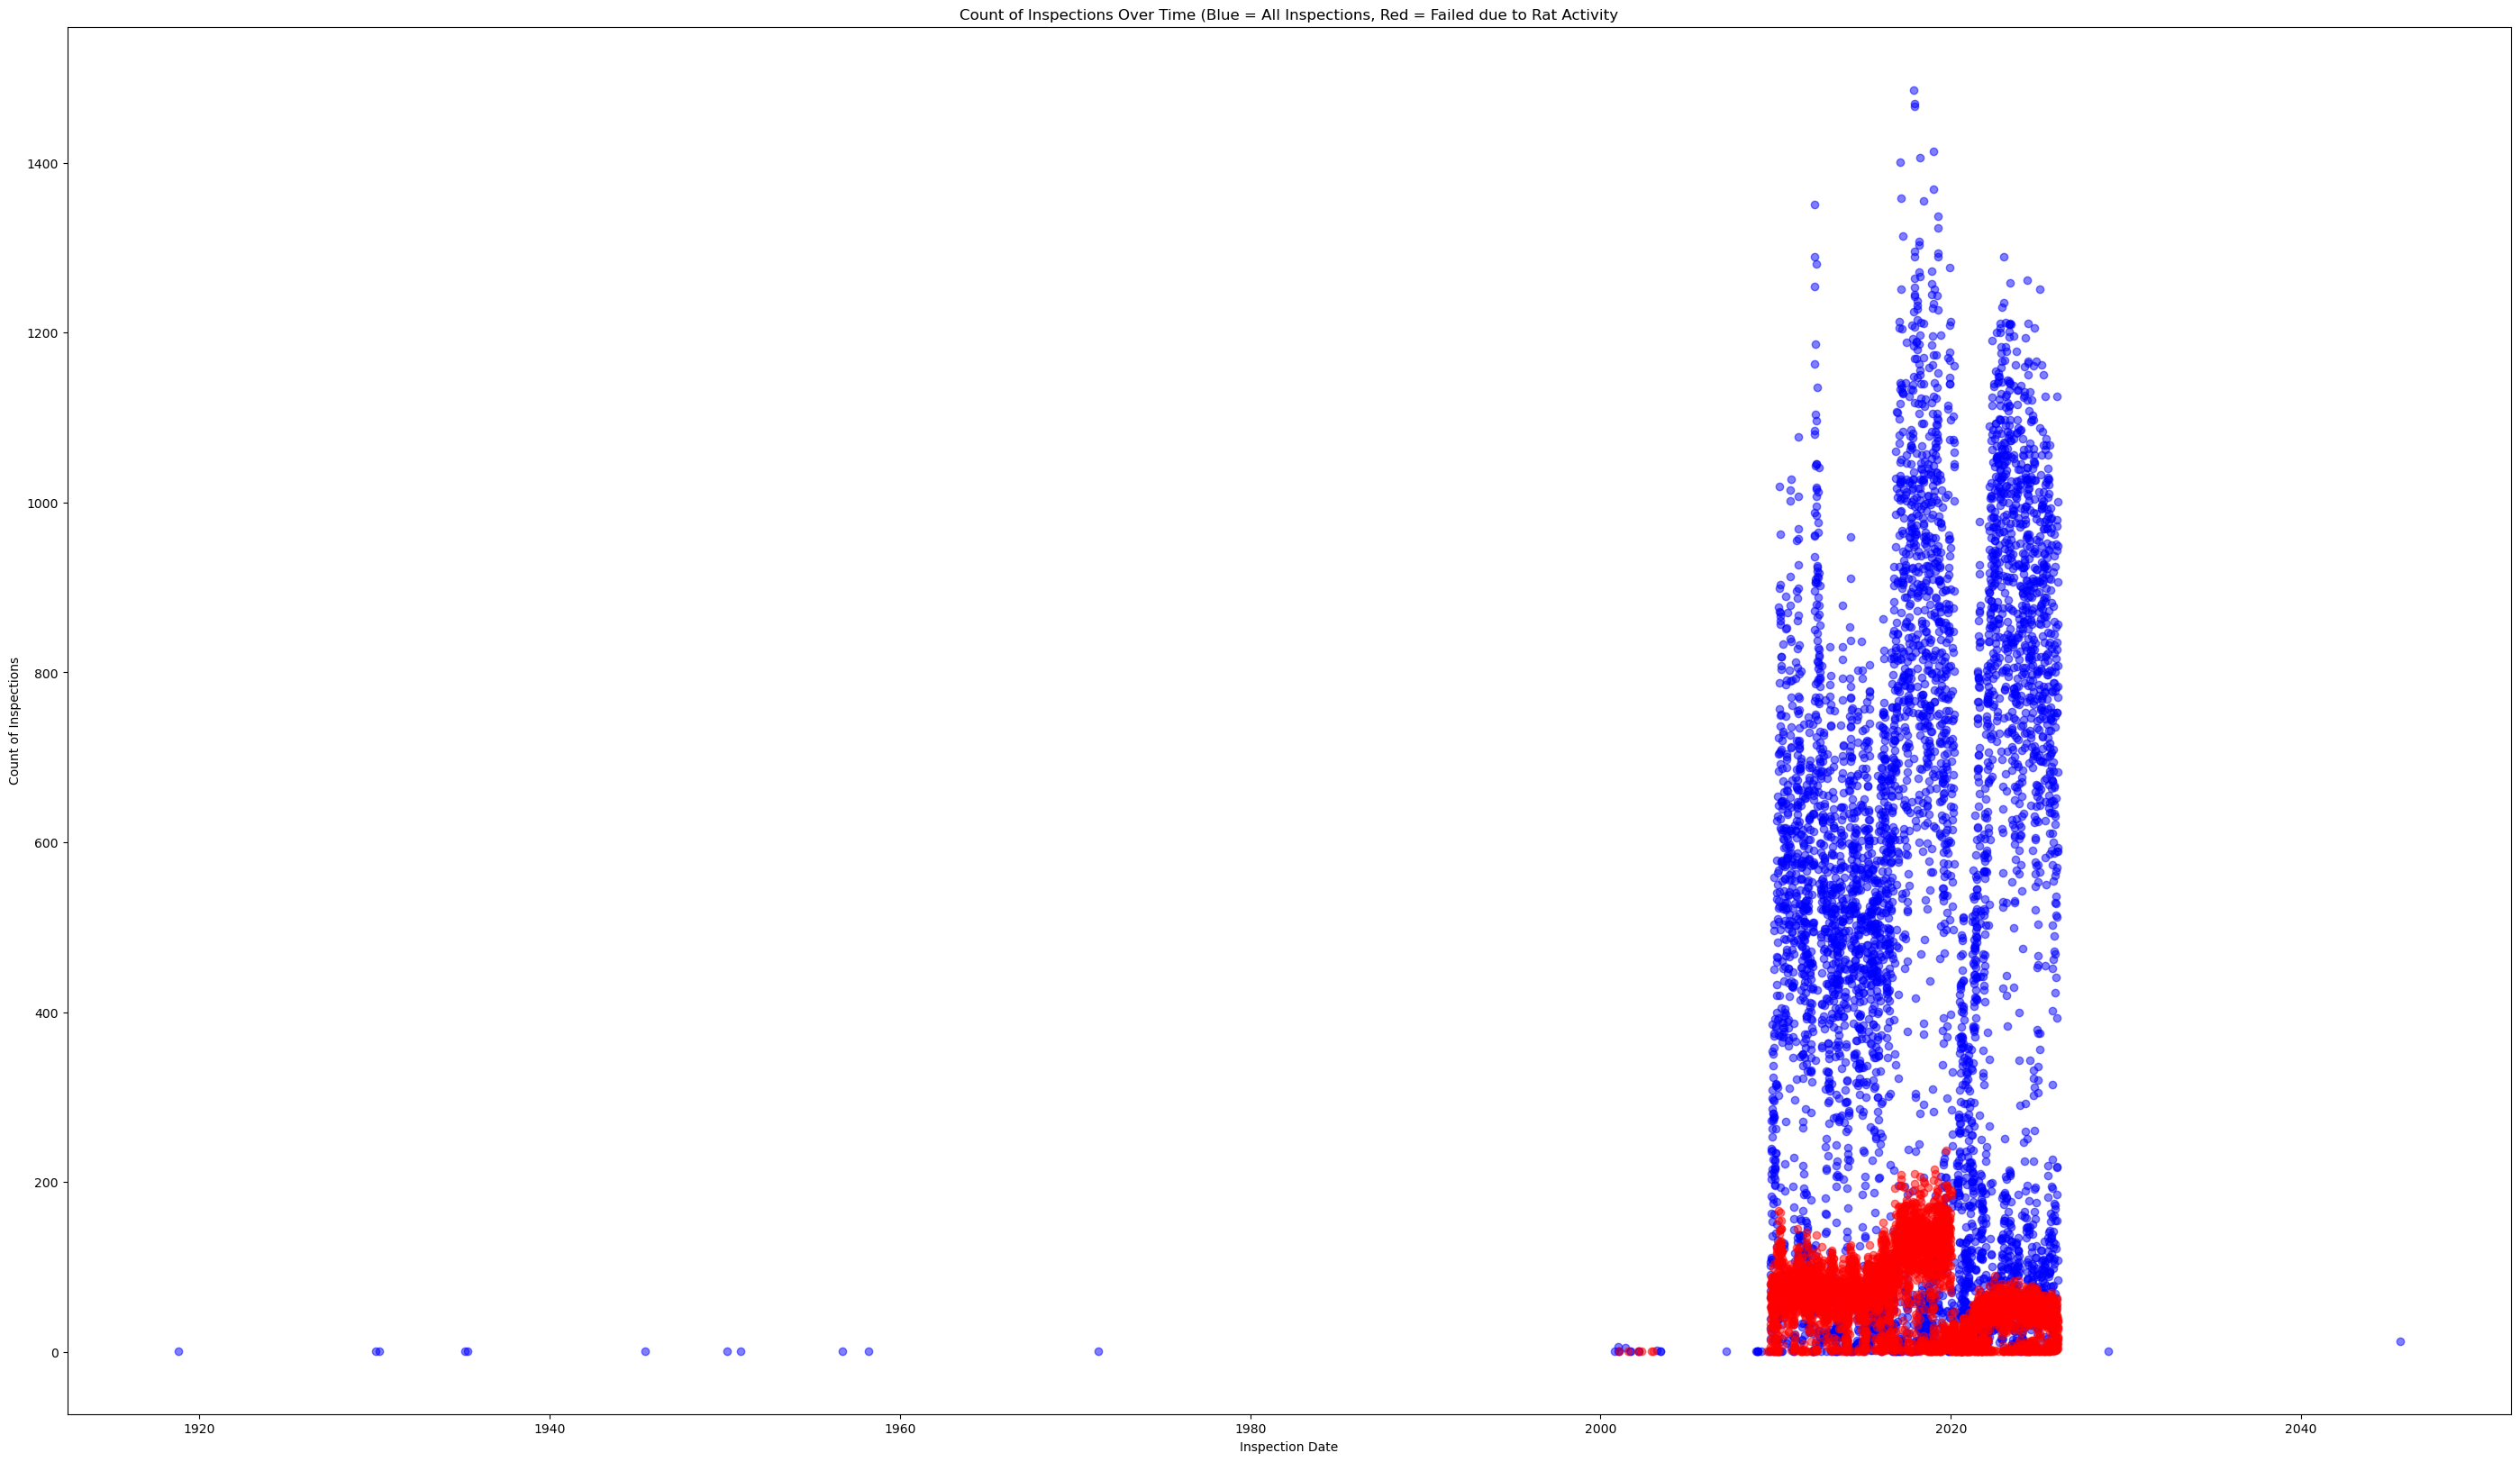

In [12]:
failed_rat_act = rat_insp[rat_insp['result'] == 'Failed for Rat Act']

failedidate = failed_rat_act.groupby(failed_rat_act['inspection_date'].dt.date).size().reset_index(name='count')

notfail = rat_insp[rat_insp['result'] != 'Failed for Rat Act']

idate = notfail.groupby(notfail['inspection_date'].dt.date).size().reset_index(name='count')


plt.figure(figsize=(35,20))
plt.plot(idate['inspection_date'], idate['count'], 'o', color="b", alpha=0.50)
plt.plot(failedidate['inspection_date'], failedidate['count'], 'o', color="r", alpha=0.50)
plt.xlabel('Inspection Date')
plt.ylabel('Count of Inspections')
plt.title('Count of Inspections Over Time (Blue = All Inspections, Red = Failed due to Rat Activity')
plt.show()

In [13]:
# The plot above seems to have some stranget data points.
# For example, we have an entry for 2045-08-28, which is in the future. 
# We also have some very old data points from before the mid 2010s.

rat_insp['inspection_date'].describe()

display(rat_insp[rat_insp['inspection_date'] > '2026-02-13'])

display(rat_insp[rat_insp['inspection_date'] > '2009-01-01'])

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
619,Initial,10457.0,40.844317,-73.909407,Bronx,2026-02-13 11:27:30,Failed for Rat Act,02/13/2026 01:03:58 PM,"(40.844316886495, -73.909407224063)"
2236,Treatments,11226.0,40.653333,-73.961615,Brooklyn,2026-02-13 11:00:32,Bait applied,02/13/2026 02:23:05 PM,"(40.653332837848, -73.961614577385)"
2808,Treatments,11226.0,40.653132,-73.959359,Brooklyn,2026-02-13 13:00:32,Bait applied,02/13/2026 02:22:19 PM,"(40.653131690899, -73.959358642159)"
3909,Initial,10457.0,40.843996,-73.909433,Bronx,2026-02-13 10:59:24,Passed,02/13/2026 01:00:38 PM,"(40.843995772608, -73.909432963139)"
6133,Treatments,10472.0,40.832466,-73.870013,Bronx,2026-02-13 09:10:17,Bait applied,02/13/2026 02:27:37 PM,"(40.832465714064, -73.87001273987)"
...,...,...,...,...,...,...,...,...,...
2754697,Initial,11233.0,40.680440,-73.931570,Brooklyn,2026-02-17 08:36:00,Passed,02/18/2026 10:37:13 AM,"(40.680439987585, -73.931569556123)"
2754860,Compliance,10031.0,40.817936,-73.952950,Manhattan,2026-02-13 11:03:56,Failed for Rat Act,02/18/2026 10:39:56 AM,"(40.817935827222, -73.952949528323)"
2754960,Initial,10457.0,40.846792,-73.908110,Bronx,2026-02-17 13:19:16,Rat Activity,02/18/2026 09:11:31 AM,"(40.846791608346, -73.908109867598)"
2755141,Initial,11206.0,40.700450,-73.938077,Brooklyn,2026-02-17 14:54:07,Passed,02/18/2026 12:00:18 PM,"(40.700450345993, -73.938076674192)"


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
0,Initial,10468.0,40.863005,-73.898474,Bronx,2024-04-15 12:40:09,Passed,04/17/2024 12:29:08 PM,"(40.863004874108, -73.89847420298)"
1,Initial,10031.0,40.828870,-73.944931,Manhattan,2017-12-28 09:45:29,Passed,01/05/2018 11:44:33 AM,"(40.828870059184, -73.944930700343)"
2,Initial,10009.0,NaN,NaN,Manhattan,2024-04-17 10:56:00,Passed,04/18/2024 10:31:45 AM,NaN
3,Initial,10459.0,40.831268,-73.890291,Bronx,2010-11-26 11:45:32,Passed,11/29/2010 12:21:17 PM,"(40.831268203249, -73.890291026227)"
4,Initial,10456.0,40.828202,-73.916468,Bronx,2014-02-20 11:56:17,Passed,02/24/2014 03:43:54 PM,"(40.82820238566, -73.916468222663)"
...,...,...,...,...,...,...,...,...,...
2995921,Initial,10457.0,40.851827,-73.888544,Bronx,2023-06-15 11:04:15,Passed,06/22/2023 10:19:15 AM,"(40.851827354474, -73.888543605154)"
2995922,Initial,10031.0,40.825352,-73.951900,Manhattan,2015-07-21 08:20:43,Passed,07/22/2015 03:46:36 PM,"(40.825351686306, -73.95190002663)"
2995923,Initial,NaN,0.000000,0.000000,Manhattan,2019-06-27 14:50:05,Passed,07/01/2019 11:02:23 AM,"(0.0, 0.0)"
2995924,Initial,10469.0,40.861591,-73.839924,Bronx,2023-02-28 09:05:03,Passed,03/01/2023 09:18:33 AM,"(40.861590578912, -73.839923624391)"


In [14]:
# We drop the outliers.

rat_insp = rat_insp[(rat_insp['inspection_date'] >= '2010-01-01') & (rat_insp['inspection_date'] <= '2026-02-13')]

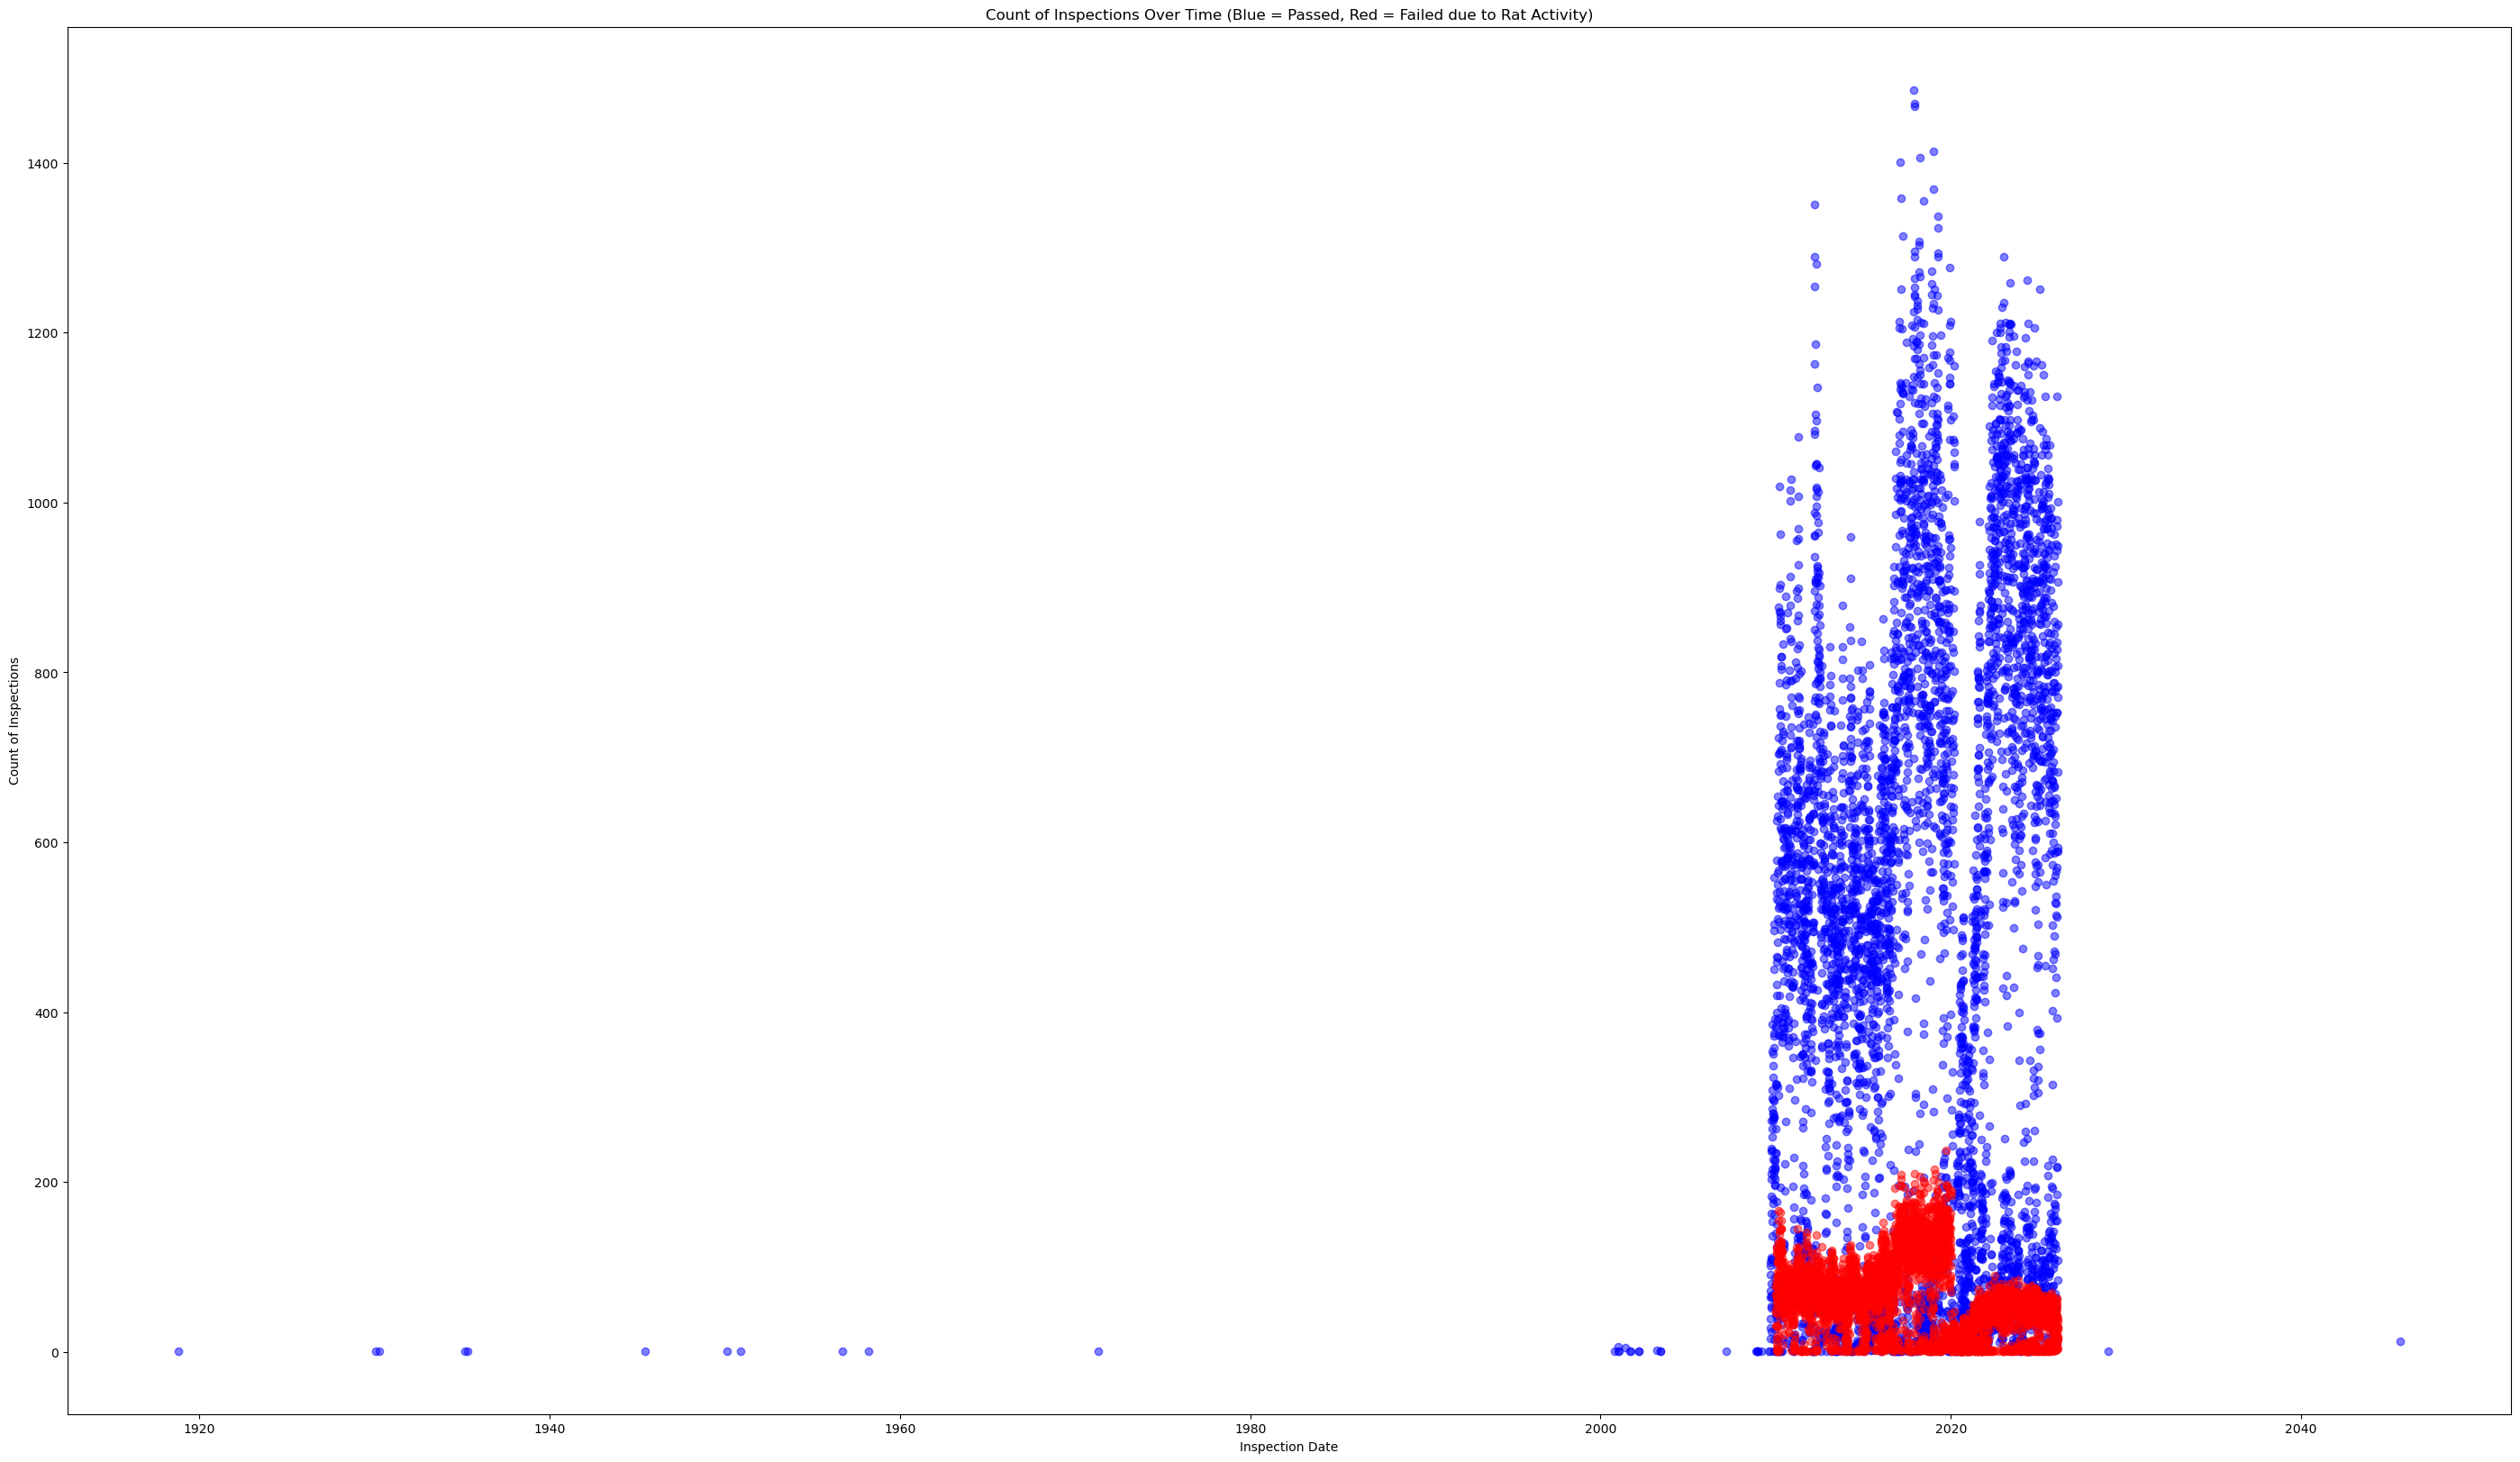

In [15]:
failed_rat_act = rat_insp[rat_insp['result'] == 'Failed for Rat Act']

failedidate = failed_rat_act.groupby(failed_rat_act['inspection_date'].dt.date).size().reset_index(name='count')

passed = rat_insp[rat_insp['result'] == 'Passed']

passidate = passed.groupby(passed['inspection_date'].dt.date).size().reset_index(name='count')


plt.figure(figsize=(35,20))
plt.plot(idate['inspection_date'], idate['count'], 'o', color="b", alpha=0.50)
plt.plot(failedidate['inspection_date'], failedidate['count'], 'o', color="r", alpha=0.50)
plt.xlabel('Inspection Date')
plt.ylabel('Count of Inspections')
plt.title('Count of Inspections Over Time (Blue = Passed, Red = Failed due to Rat Activity)')
plt.show()

In [16]:
import plotly.figure_factory as ff


# Add a dummy column to count each row
rat_insp['dummy_count'] = 1

fig = ff.create_hexbin_mapbox(
    data_frame=rat_insp,
    lat="latitude",
    lon="longitude",
    nx_hexagon=20,             # Number of hexagons in x direction
    color="dummy_count",       # Sum of dummy_count = number of occurrences
    agg_func=np.sum,           # Sum the dummy column
    opacity=0.85,
    labels={"color": "Number of Inspections"},
)

fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(b=0, t=0, l=0, r=0),
)
fig.show()

rat_insp.drop(columns=['dummy_count'], inplace=True)


/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:122: RuntimeWarning: invalid value encountered in cast
  ix1 = np.round(x).astype(int)
/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:123: RuntimeWarning: invalid value encountered in cast
  iy1 = np.round(y).astype(int)
/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:124: RuntimeWarning: invalid value encountered in cast
  ix2 = np.floor(x).astype(int)
/opt/anaconda3/envs/erdos_ds_environment/lib/python3.12/site-packages/plotly/figure_factory/_hexbin_mapbox.py:125: RuntimeWarning: invalid value encountered in cast
  iy2 = np.floor(y).astype(int)


In [17]:
# The above map has points not in New York City.
# Let's check the latitude and longitude data to see if there are any obvious errors or outliers.

display(rat_insp[['latitude', 'longitude']].describe())

,latitude,longitude
count,2.952557e+06,2.952557e+06
mean,4.050319e+01,-7.346797e+01
std,3.225375e+00,5.848431e+00
min,-1.890702e+01,-7.946610e+01
25%,4.069399e+01,-7.395833e+01
50%,4.075496e+01,-7.393542e+01
75%,4.082991e+01,-7.390293e+01
max,4.091286e+01,0.000000e+00


In [18]:
# Let's look at the rows with the minimum and maximum latitude and longitude values to see if there are any obvious errors or outliers.
display(rat_insp[rat_insp['latitude'] == rat_insp['latitude'].min()])
display(rat_insp[rat_insp['latitude'] == rat_insp['latitude'].max()])
display(rat_insp[rat_insp['longitude'] == rat_insp['longitude'].min()])
display(rat_insp[rat_insp['longitude'] == rat_insp['longitude'].max()])

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
536832,Initial,11417.0,-18.907019,-79.466103,Queens,2010-01-14 08:36:00,Failed for Other R,01/20/2010 10:58:28 AM,"(-18.9070188901517, -79.4661030572311)"
1262150,Compliance,11417.0,-18.907019,-79.466103,Queens,2010-03-04 13:10:29,Failed for Other R,03/11/2010 09:34:29 AM,"(-18.9070188901517, -79.4661030572311)"


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
93182,Initial,10471.0,40.912863,-73.902472,Bronx,2020-02-19 16:15:00,Failed for Other R,02/20/2020 11:18:11 AM,"(40.91286346943, -73.902471669247)"
222405,Initial,10471.0,40.912863,-73.902472,Bronx,2013-06-26 16:15:09,Passed,07/01/2013 10:27:51 AM,"(40.91286346943, -73.902471669247)"
1053954,Initial,10471.0,40.912863,-73.902472,Bronx,2022-01-21 15:10:00,Rat Activity,01/24/2022 11:55:33 AM,"(40.91286346943, -73.902471669247)"
2258197,Compliance,10471.0,40.912863,-73.902472,Bronx,2015-08-11 16:10:08,Passed,08/12/2015 03:43:37 PM,"(40.91286346943, -73.902471669247)"
2383498,Initial,10471.0,40.912863,-73.902472,Bronx,2014-11-21 16:00:51,Failed for Rat Act,11/24/2014 09:21:05 AM,"(40.91286346943, -73.902471669247)"
2582424,Initial,10471.0,40.912863,-73.902472,Bronx,2018-06-28 15:55:37,Passed,06/29/2018 10:24:47 AM,"(40.91286346943, -73.902471669247)"
2638074,Compliance,10471.0,40.912863,-73.902472,Bronx,2022-02-24 16:25:00,Rat Activity,03/01/2022 12:17:06 PM,"(40.91286346943, -73.902471669247)"


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
536832,Initial,11417.0,-18.907019,-79.466103,Queens,2010-01-14 08:36:00,Failed for Other R,01/20/2010 10:58:28 AM,"(-18.9070188901517, -79.4661030572311)"
1262150,Compliance,11417.0,-18.907019,-79.466103,Queens,2010-03-04 13:10:29,Failed for Other R,03/11/2010 09:34:29 AM,"(-18.9070188901517, -79.4661030572311)"


,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
156,Initial,NaN,0.0,0.0,Bronx,2018-04-23 13:55:45,Passed,04/26/2018 08:15:44 AM,"(0.0, 0.0)"
384,Initial,NaN,0.0,0.0,Staten Island,2010-11-05 11:55:17,Failed for Other R,11/08/2010 12:47:37 PM,"(0.0, 0.0)"
552,Initial,NaN,0.0,0.0,Bronx,2019-08-20 11:12:45,Passed,08/23/2019 02:09:21 PM,"(0.0, 0.0)"
575,Compliance,NaN,0.0,0.0,Staten Island,2011-07-20 15:55:36,Passed,07/21/2011 10:32:44 AM,"(0.0, 0.0)"
600,Compliance,NaN,0.0,0.0,Staten Island,2011-11-01 14:50:36,Passed,11/03/2011 10:44:48 AM,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...
2995247,Initial,NaN,0.0,0.0,Manhattan,2023-08-04 08:56:00,Passed,08/07/2023 08:27:34 AM,"(0.0, 0.0)"
2995430,Initial,NaN,0.0,0.0,Manhattan,2016-09-27 14:35:09,Passed,10/05/2016 08:08:49 AM,"(0.0, 0.0)"
2995439,Initial,NaN,0.0,0.0,Manhattan,2015-07-24 13:40:30,Passed,07/27/2015 09:07:48 AM,"(0.0, 0.0)"
2995855,Initial,NaN,0.0,0.0,Bronx,2025-02-20 08:00:00,Failed for Rat Act,02/21/2025 09:26:27 AM,"(0.0, 0.0)"


In [19]:
# For these entries, let's set their latitude and longitude values to NaN since they are likely to be errors.
rat_insp.loc[rat_insp['latitude'] == rat_insp['latitude'].min(), ['latitude', 'longitude']] = np.nan
rat_insp.loc[rat_insp['latitude'] == rat_insp['latitude'].max(), ['latitude', 'longitude']] = np.nan
rat_insp.loc[rat_insp['longitude'] == rat_insp['longitude'].min(), ['latitude', 'longitude']] = np.nan
rat_insp.loc[rat_insp['longitude'] == rat_insp['longitude'].max(), ['latitude', 'longitude']] = np.nan

In [20]:
pip install geopy pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Let's make sure that we deal with entries with weird 'zip_code' entries.
# The weird zip-codes are 0, 458, 1045, 12345.



In [37]:
zipcodes = rat_insp['zip_code'].values
zipcodes = np.unique(zipcodes)

In [38]:
display(zipcodes)
print(len(zipcodes))

array([    0.,   458.,  1045., 10000., 10001., 10002., 10003., 10004.,
       10005., 10006., 10007., 10009., 10010., 10011., 10012., 10013.,
       10014., 10016., 10017., 10018., 10019., 10020., 10021., 10022.,
       10023., 10024., 10025., 10026., 10027., 10028., 10029., 10030.,
       10031., 10032., 10033., 10034., 10035., 10036., 10037., 10038.,
       10039., 10040., 10041., 10044., 10045., 10055., 10065., 10069.,
       10075., 10103., 10105., 10106., 10110., 10112., 10115., 10118.,
       10119., 10120., 10121., 10122., 10123., 10128., 10151., 10152.,
       10153., 10154., 10155., 10158., 10162., 10165., 10167., 10168.,
       10169., 10170., 10171., 10172., 10173., 10174., 10176., 10177.,
       10178., 10271., 10278., 10279., 10280., 10281., 10282., 10301.,
       10302., 10303., 10304., 10305., 10306., 10307., 10308., 10309.,
       10310., 10312., 10314., 10451., 10452., 10453., 10454., 10455.,
       10456., 10457., 10458., 10459., 10460., 10461., 10462., 10463.,
      

232


In [24]:
# There are some weird zipcodes.

display(rat_insp[rat_insp['zip_code']== 0])

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
175,Initial,0.0,40.868506,-73.907337,Bronx,2015-10-02 15:01:00,Passed,10/13/2015 11:39:55 AM,"(40.8685058719427, -73.9073369197999)"
1031,Initial,0.0,40.847010,-73.885899,Bronx,2015-03-17 12:05:43,Passed,03/26/2015 08:54:10 AM,"(40.847010495395, -73.8858988738482)"
2652,Initial,0.0,40.666171,-73.939408,Brooklyn,2017-11-28 11:44:15,Passed,11/30/2017 05:08:39 PM,"(40.6661708903889, -73.9394083301799)"
2725,Initial,0.0,40.764468,-73.994573,Manhattan,2018-06-20 15:56:03,Passed,06/28/2018 02:44:59 PM,"(40.7644681228807, -73.994572879785)"
3759,Initial,0.0,40.815064,-73.950945,Manhattan,2016-05-02 09:20:30,Passed,05/03/2016 10:37:16 AM,"(40.8150638637026, -73.950944726912)"
...,...,...,...,...,...,...,...,...,...
2993231,Initial,0.0,40.777855,-73.988955,Manhattan,2017-02-13 11:31:42,Passed,02/21/2017 10:37:32 AM,"(40.777855019759, -73.9889552645064)"
2994411,Initial,0.0,40.574119,-74.086471,Staten Island,2016-08-23 12:39:01,Failed for Other R,08/25/2016 08:59:09 AM,"(40.5741190913367, -74.0864713362563)"
2995557,Initial,0.0,40.858277,-73.885066,Bronx,2019-03-08 13:17:46,Passed,03/11/2019 12:54:48 PM,"(40.8582766625384, -73.8850660485819)"
2995792,Initial,0.0,40.840247,-73.921969,Bronx,2019-01-14 15:12:42,Passed,01/16/2019 10:08:48 AM,"(40.8402469829966, -73.9219686423683)"


In [25]:
display(rat_insp[rat_insp['zip_code']== 458])

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
648197,Initial,458.0,NaN,NaN,Bronx,2020-03-13 14:20:24,Failed for Rat Act,03/23/2020 02:32:13 PM,NaN


In [26]:
display(rat_insp[rat_insp['zip_code']== 1045])

,inspection_type,zip_code,latitude,longitude,borough,inspection_date,result,approved_date,location
2562946,Initial,1045.0,NaN,NaN,Bronx,2021-05-28 09:11:00,Passed,06/04/2021 11:59:32 AM,NaN


In [27]:
# Let's save the cleaned dataframe to a new csv file for future use.
# Since the dataframe is quite large, we will split it up into multiple csv files 
# based on the year of the inspection date.
for year in rat_insp['inspection_date'].dt.year.unique():
    yearly_data = rat_insp[rat_insp['inspection_date'].dt.year == year]
    yearly_data.to_csv(f'scr/data/cleaned_rat_inspection_data/rat_inspection_{year}.csv', index=False)

In [39]:
type(zipcodes)

zipcodes = pd.DataFrame(zipcodes)

In [46]:
zipcodes.to_csv('NYC_zipcodes.csv', index = False, header = False)